In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 

from matplotlib import rcParams
from matplotlib.ticker import FormatStrFormatter

import statsmodels.api as sm
from statsmodels.formula.api import ols

## Time Series Housing 

In [2]:
df = pd.read_csv('../data/curated/Fixed_Monthly_Median_Suburb_Rents.csv', index_col = 0)

df['Year'] = df['Year'].astype(int)
df.head(5)

,Year,Quarter,Region,Suburb,Median
0,2000,4,Inner Melbourne,armadale,210.0
1,2000,4,Inner Melbourne,carlton north,270.0
2,2000,4,Inner Melbourne,east melbourne,273.0
3,2000,4,Inner Melbourne,st kilda,185.0
4,2000,4,Inner Melbourne,elwood,210.0


In [3]:
model = ols('Median ~   C(Quarter) ', data = df)
sm.stats.anova_lm(model.fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(Quarter),0.0,0.000000e+00,NaN,NaN,NaN
Residual,4449.0,4.710170e+07,10587.031625,NaN,NaN


In [4]:
df = df[df['Quarter'] == 4].reset_index(drop = True)

In [5]:
region_grp = df.groupby(['Year','Region'], as_index = False).mean()
region_grp['Region'].head()

0                   Ballarat
1                    Bendigo
2                    Geelong
3    Inner Eastern Melbourne
4            Inner Melbourne
Name: Region, dtype: object

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


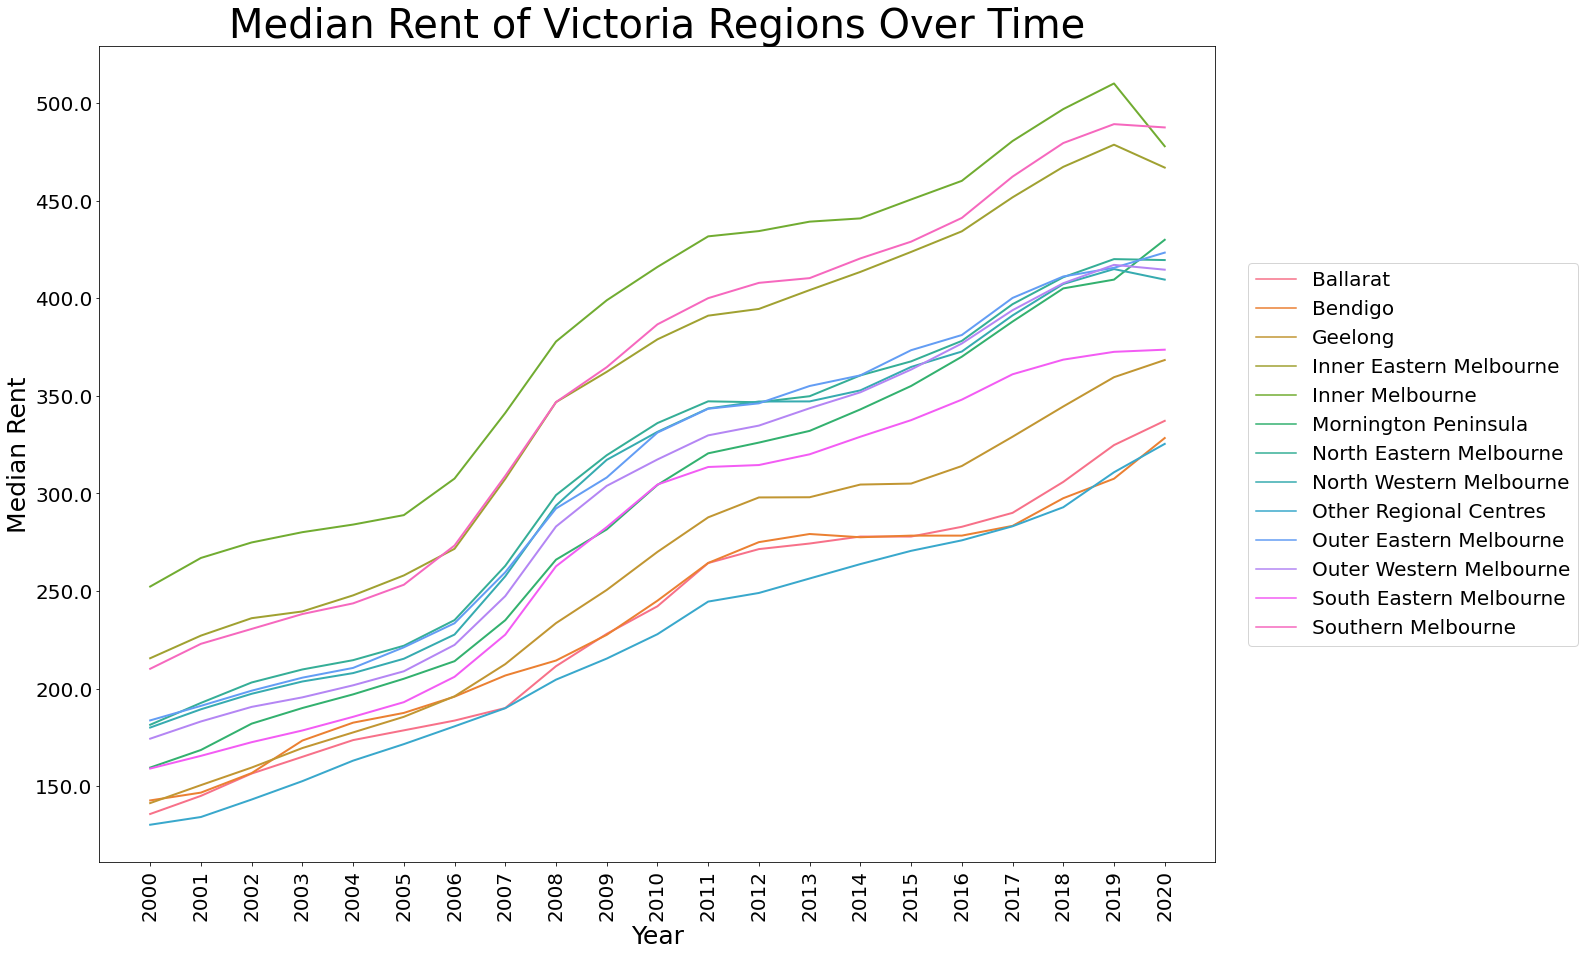

In [6]:
plt.figure(figsize=(20, 15)) 

region_grp['Year'] = region_grp['Year'].astype(str)

fig = sns.lineplot(x="Year", y="Median",
             hue="Region",
             data=region_grp,      
             linewidth = 2)


fig.set_title('Median Rent of Victoria Regions Over Time', size = 40)
fig.set_yticklabels(fig.get_yticks(), size = 20)
fig.set_xticklabels([i + 2000 for i in fig.get_xticks()], size = 20, rotation = 90)
fig.set_ylabel('Median Rent', size = 25)
fig.set_xlabel('Year', size = 25)
fig.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1,  prop={'size': 20})

In [7]:
percentage_changes = df.copy()

percentage_changes.sort_values(['Suburb','Year'], inplace = True, ascending=[True, True])

percentage_changes['pct_chg'] = (percentage_changes.groupby('Suburb')['Median']
                                  .apply(pd.Series.pct_change) + 1)

percentage_changes.head()

,Year,Quarter,Region,Suburb,Median,pct_chg
4443,2000,4,Inner Melbourne,abbotsford,240.0,NaN
4317,2001,4,Inner Melbourne,abbotsford,250.0,1.041667
4191,2002,4,Inner Melbourne,abbotsford,260.0,1.040000
4065,2003,4,Inner Melbourne,abbotsford,265.0,1.019231
3939,2004,4,Inner Melbourne,abbotsford,275.0,1.037736


In [8]:
prc_changes_mean = percentage_changes.groupby(['Region', 'Suburb'], as_index = False).mean().sort_values(by =['pct_chg'], ascending = False)

ten_highest = prc_changes_mean.head(10).reset_index(drop = True)
ten_lowest = prc_changes_mean.tail(10).reset_index(drop = True)

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


Text(0.5, 1.0, 'Suburbs with Highest (Average) Increace in Rent Since 2000')

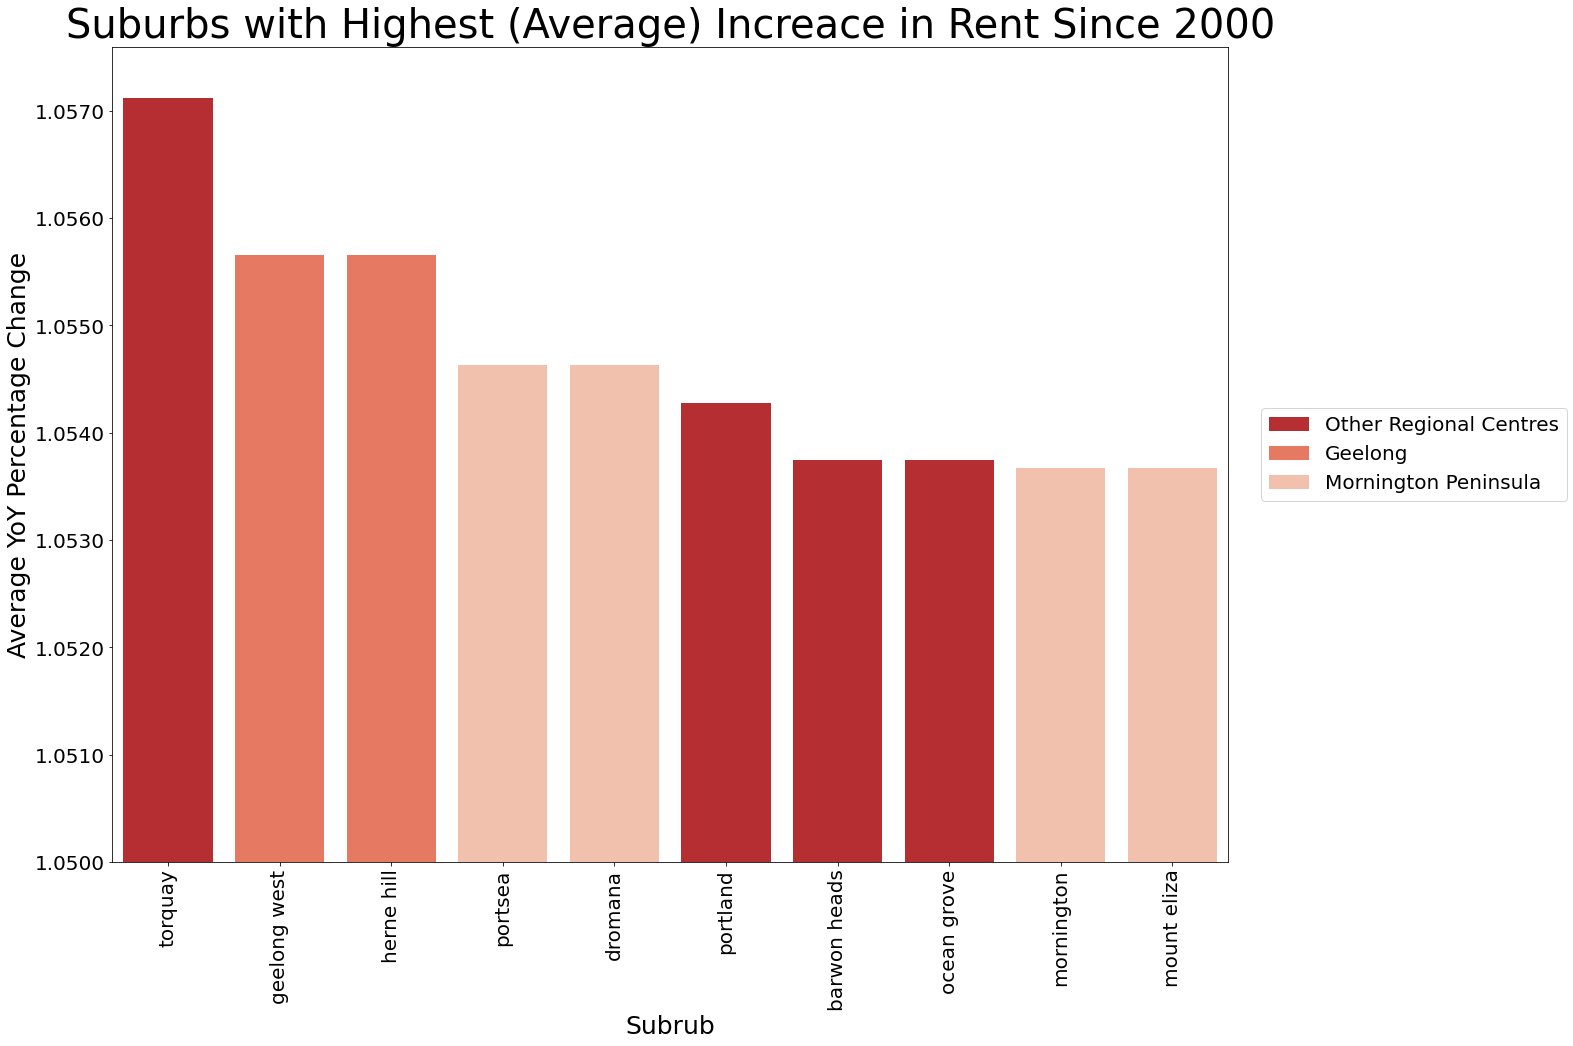

In [9]:
plt.figure(figsize=(20, 15)) 
fig = sns.barplot(x = 'Suburb', y = 'pct_chg', hue = 'Region', data = ten_highest, palette = 'Reds_r' ,  dodge=False)
fig.set(ylim=(1.05, 1.0576))
fig.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1,  prop={'size': 20})

fig.set_ylabel('Average YoY Percentage Change', size = 25)
fig.set_xlabel('Subrub', size = 25)

fig.set_yticklabels(fig.get_yticks(), size = 20)
fig.set_xticklabels([i for i in ten_highest['Suburb']], size = 20, rotation = 90)
fig.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
fig.set_title('Suburbs with Highest (Average) Increace in Rent Since 2000', size = 40)

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


Text(0.5, 1.0, 'Suburbs with Lowest (Average) Increace in Rent Since 2000')

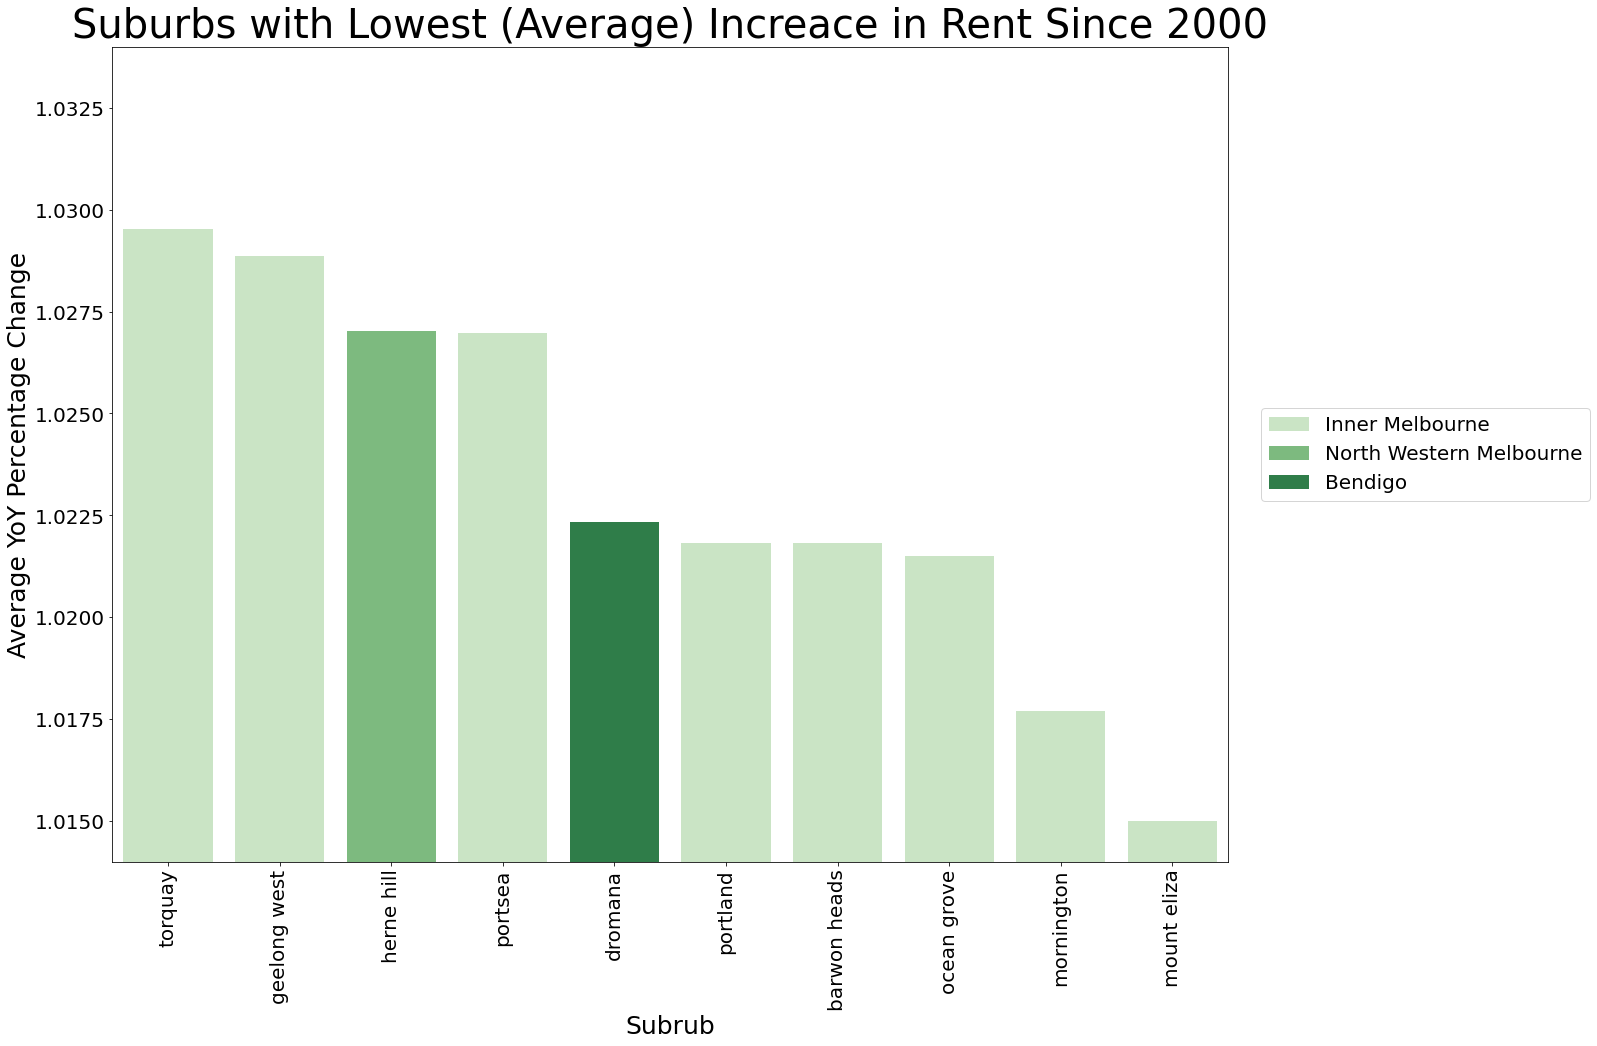

In [10]:
plt.figure(figsize=(20, 15)) 
fig = sns.barplot(x = 'Suburb', y = 'pct_chg', hue = 'Region', data = ten_lowest, palette = 'Greens' , dodge=False)
fig.set(ylim=(1.014, 1.034))
fig.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1,  prop={'size': 20})

fig.set_ylabel('Average YoY Percentage Change', size = 25)
fig.set_xlabel('Subrub', size = 25)

fig.set_yticklabels(fig.get_yticks(), size = 20)
fig.set_xticklabels([i for i in ten_highest['Suburb']], size = 20, rotation = 90)

fig.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
fig.set_title('Suburbs with Lowest (Average) Increace in Rent Since 2000', size = 40)

In [11]:
prc_changes_std = percentage_changes.groupby(['Region', 'Suburb'], as_index = False). \
            std().sort_values(by =['pct_chg'], ascending = False)


twenty_highest = prc_changes_std.head(20).reset_index(drop = True)
twenty_lowest = prc_changes_std.tail(20).reset_index(drop = True)

twenty_highest 

,Region,Suburb,Year,Quarter,Median,pct_chg
0,North Western Melbourne,brunswick,6.128701,0.0,90.055758,0.111948
1,Inner Melbourne,st kilda,6.128701,0.0,78.976452,0.072752
2,Other Regional Centres,hamilton,6.204837,0.0,50.100185,0.072507
3,Inner Melbourne,docklands,5.627314,0.0,71.716629,0.068816
4,Inner Melbourne,southbank,6.204837,0.0,79.662981,0.067882
5,North Eastern Melbourne,alphington,6.204837,0.0,92.095318,0.062781
6,North Eastern Melbourne,fairfield,6.204837,0.0,92.095318,0.062781
7,Southern Melbourne,brighton east,6.204837,0.0,149.704582,0.062592
8,North Western Melbourne,keilor,6.204837,0.0,80.049925,0.062541
9,Inner Melbourne,east melbourne,6.204837,0.0,86.466922,0.061774


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


Text(0.5, 1.0, 'Suburbs with Highest Volatility in Rent Since 2000')

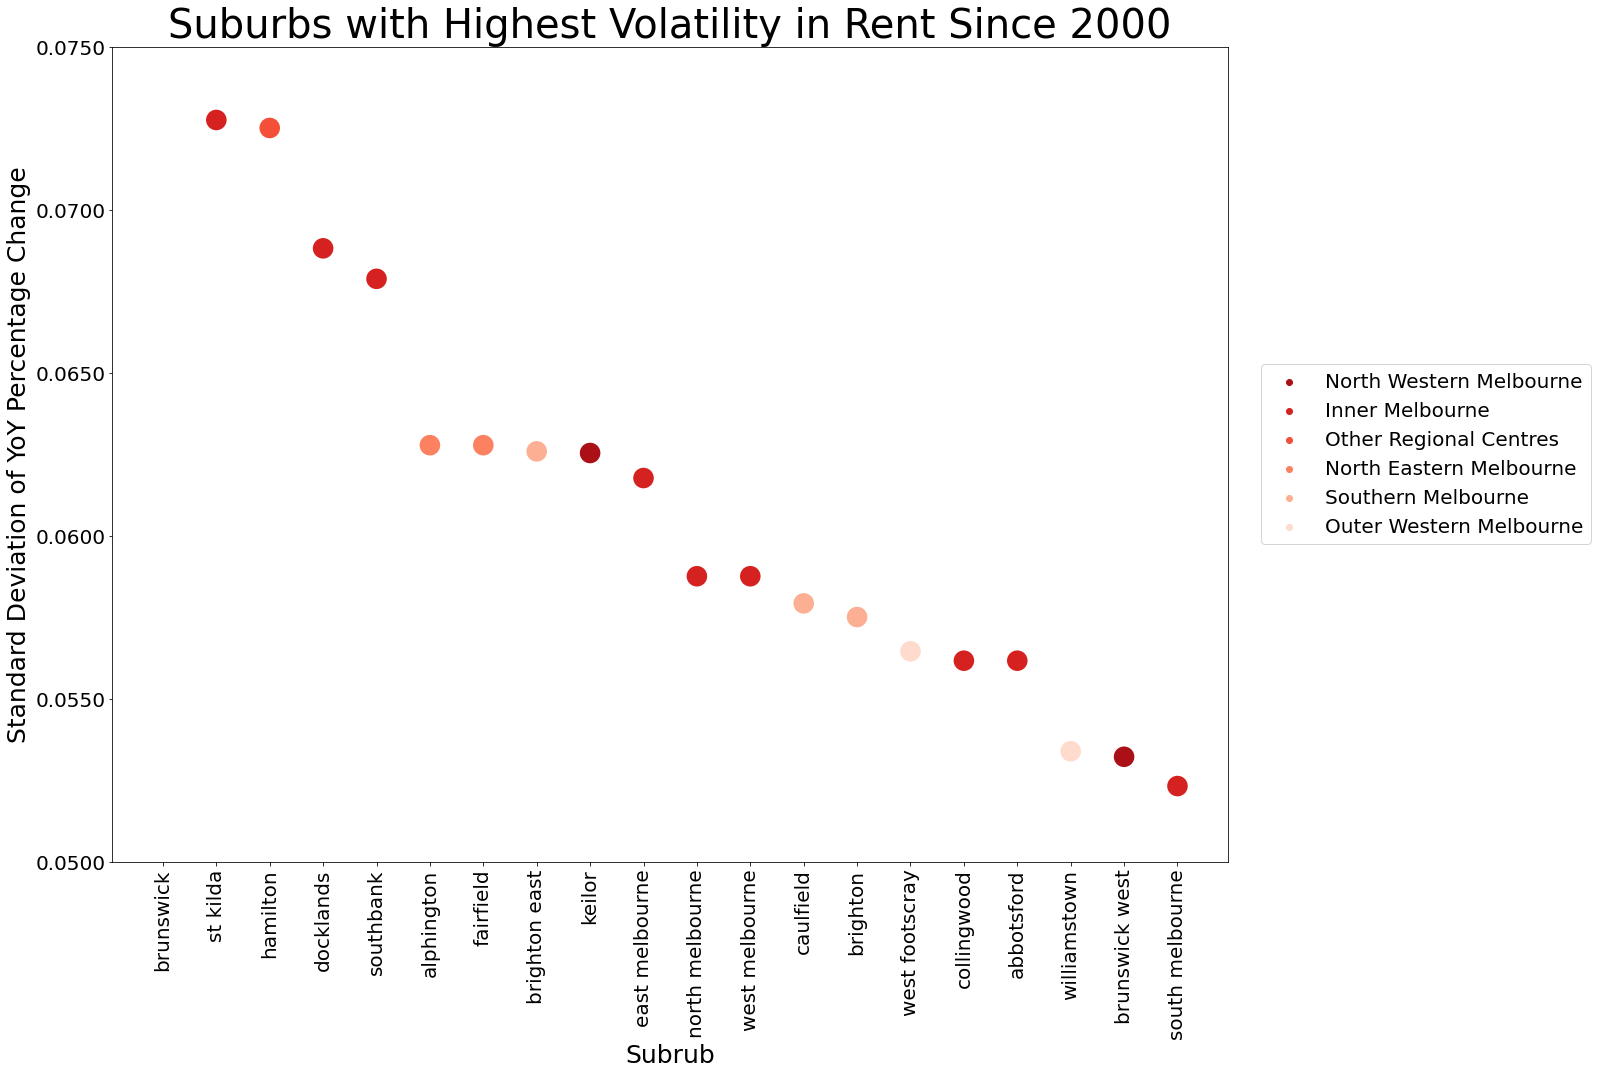

In [12]:
plt.figure(figsize=(20, 15)) 
fig = sns.scatterplot(x = 'Suburb', y = 'pct_chg', hue = 'Region', data = twenty_highest, palette = 'Reds_r', s=500)

fig.set(ylim=(0.05, 0.075))

fig.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1,  prop={'size': 20})

fig.set_ylabel('Standard Deviation of YoY Percentage Change', size = 25)
fig.set_xlabel('Subrub', size = 25)

fig.set_yticklabels(fig.get_yticks(), size = 20)
fig.set_xticklabels([i for i in twenty_highest['Suburb']], size = 20, rotation = 90)

fig.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
fig.set_title('Suburbs with Highest Volatility in Rent Since 2000', size = 40)

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


Text(0.5, 1.0, 'Suburbs with Lowest Volatility in Rent Since 2000')

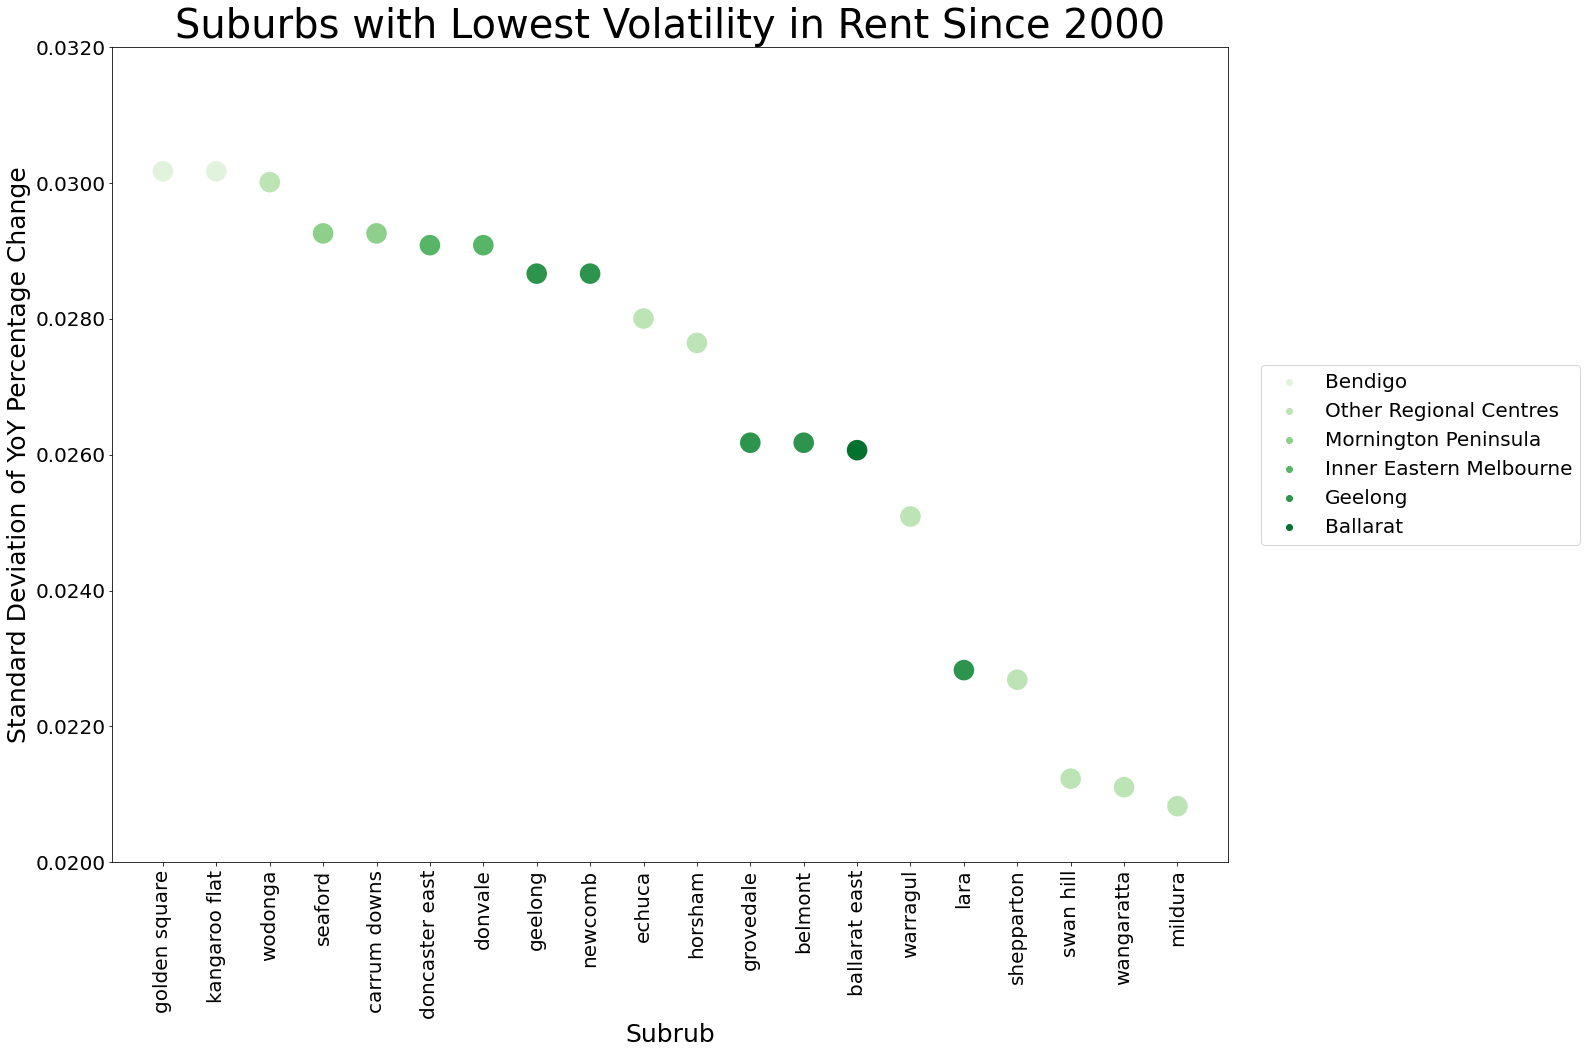

In [13]:
plt.figure(figsize=(20, 15)) 
fig = sns.scatterplot(x = 'Suburb', y = 'pct_chg', hue = 'Region', data = twenty_lowest, palette = 'Greens', s=500)

fig.set(ylim=(0.02, 0.032))

fig.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1,  prop={'size': 20})

fig.set_ylabel('Standard Deviation of YoY Percentage Change', size = 25)
fig.set_xlabel('Subrub', size = 25)

fig.set_yticklabels(fig.get_yticks(), size = 20)
fig.set_xticklabels([i for i in twenty_lowest['Suburb']], size = 20, rotation = 90)

fig.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
fig.set_title('Suburbs with Lowest Volatility in Rent Since 2000', size = 40)

## Sporting Facilities 

In [14]:
sporting = pd.read_csv('../data/curated/VIC_SPORTING_FACILITIES.csv', index_col = 0 )
sporting['Suburb/Town'] = sporting['Suburb/Town'].str.lower()
sporting.reset_index(drop = True)
sporting.head()

,LGA Name,Facility Name,Suburb/Town,Pcode,Latitude,Longitude,Sports Played
6,Alpine Shire Council,Mount Beauty Pool & Stadium,mount beauty,3699,-36.740988,147.168502,Aerobics
7,Alpine Shire Council,Mount Beauty recreation Reserve,mount beauty,3699,-36.739256,147.172162,Athletics
8,Alpine Shire Council,Dederang Recreation reserve,dederang,3691,-36.475264,147.020525,Australian Rules Football
9,Alpine Shire Council,Mount Beauty recreation Reserve,mount beauty,3699,-36.739256,147.172162,Australian Rules Football
10,Alpine Shire Council,Pioneer Park Recreation Reserve,bright,3741,-36.737199,146.973353,Australian Rules Football


In [15]:
spt_fac_counts = sporting.groupby('Suburb/Town', as_index = False).count()[['Suburb/Town', 'Facility Name']] 
spt_fac_counts = spt_fac_counts.rename(columns={'Facility Name': 'No_Sporting_Facilities'}) 

In [16]:
latest_rents = df[df['Year'] == 2020].reset_index(drop = True)
latest_rents = latest_rents.merge(spt_fac_counts, left_on = 'Suburb', right_on = 'Suburb/Town', how = 'inner')